In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets


In [2]:
 def f(t): 
    
    if type(t) == int or type(t) == float:
        if t >= 0 and t <= 2*np.pi:
            return np.sin(t - np.pi/2) + 1
        elif t >= 2*np.pi:
            return 0
        
    else:
        result = [np.sin(i - np.pi/2) + 1 if i >= 0 and i <= 2*np.pi else 0 for i in t]
        return result
    
    
def rectangle_integral(f, points, delta, lag_obj):
    result = np.array([np.sum(np.multiply(f(points), lag_obj.laguerre_func(n = k, t = points)) * np.e**(-(lag_obj.alpha)*points) * delta) for k in range(lag_obj.N + 1)])
    return result

In [3]:
class Laguerre:

    def __init__(self,beta, sigma, number_of_points, eps, T,N):
        self.beta = beta
        self.sigma = sigma
        self.number_of_points = number_of_points
        self.eps = eps
        self.T = T
        self.N = N
        self.alpha = self.sigma - self.beta

    
    def check_type(self, t):
        if type(t) == int or type(t) == float:
            return t
        else:
            return t.any()
        
    def laguerre_func(self, t, n):  
        
        if self.check_type(t) < 0 and n < 0:
            return print("You entered incorrect data.")
        
        laguerre_result_0 = np.sqrt(self.sigma) * np.exp(t * (-self.beta / 2))
        laguerre_result_1 = laguerre_result_0 * (1 - t * self.sigma)

        if n == 0:
            return laguerre_result_0
        elif n == 1:
            return laguerre_result_1
        else:
            for i in range(2, n+1):
                laguerre_result_n = ((2 * i - 1 - t * self.sigma) / i) * laguerre_result_1 - ((i - 1) / i) * laguerre_result_0
                laguerre_result_0 = laguerre_result_1
                laguerre_result_1 = laguerre_result_n
            return laguerre_result_n

    def laguerre_tabulation(self, t, n):
        laguerre_result_0 = self.laguerre_func(t, 0)
        laguerre_result_1 = self.laguerre_func(t, 1)
        list_of_lag = [laguerre_result_0, laguerre_result_1]
        list_of_t_values = [i for i in range(0,t+1)]
        for i in range(2, t+1):
            laguerre_result_n = self.laguerre_func(t, i)
            laguerre_result_0 = laguerre_result_1
            laguerre_result_1 = laguerre_result_n
            list_of_lag.append(laguerre_result_n)
        return list_of_lag, list_of_t_values

#             C# another func
    def function_graph(self, fun, a, b, n,number_of_points):
        fig = plt.figure(figsize=(7, 5))
        ax = fig.gca()

        x = np.linspace(a, b, number_of_points)

        for i in range(n):
            y = np.array([func_val for func_val in self.laguerre_func(x, i)])
            ax.plot(x, y)

        ax.axhline(color='grey')
        ax.axvline(color='grey')
        ax.set_xlim(a, b)
        ax.set_xlabel('x')
        ax.set_ylabel('lag_func(x)')
        ax.grid()
        plt.show()
    
    def transformation(self, func):
        number_of_points = self.number_of_points
        delt = (self.T) / (number_of_points - 1)
        half_delta = delt / 2
        ponts = np.linspace(0 + half_delta, self.T - half_delta, number_of_points - 1)
        res_0 = np.array([0] * (self.N+1))
        res_1 = rectangle_integral(f = func, points = ponts, delta = delt, lag_obj = self)
            
        while ((np.abs(res_0 - res_1)) > self.eps).any():
            res_0 = res_1
            number_of_points *= 2
            delta_ = (self.T) / (number_of_points - 1)
            half_delta = delta_ / 2
            points_ = np.linspace(0 + half_delta, self.T - half_delta, number_of_points - 1)
            res_1 = rectangle_integral(f = func, points = ponts, delta = delt, lag_obj = self)
            
        return res_1 
            
        
    def inverse_Laguerre_transformation(self, t, func = f):
        seq = self.transformation(f)
        lag = [self.laguerre_func(t, i) for i in range(len(seq))]
        h = sum(seq * lag)
        
        return h

In [4]:
def init_laguerre(t, beta, sigma, T, number_of_points, eps, N, n, a, b):
    lag = Laguerre(beta, sigma, number_of_points, eps, T,N)
    func = lag.laguerre_tabulation(t,n)
    lag.function_graph(func, a, b, n, number_of_points)
    print(lag.laguerre_func(t,n))
    display(func)

In [5]:
def graph_for_transform_lag(lag_obj, func, N_arr, a, T=np.pi*2, num_of_pts = 300):
        fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,3.5))
        t = np.linspace(a, T, num_of_pts)
        f_t = func(t)
        ax1.plot(t, f_t, 'r')
        ax1.set_title('function')
        ax1.set_xlabel('x')
        ax1.set_ylabel('f(x)')
        
        f_N = []
        delta = (T-a)/(num_of_pts-1)
        t_range = np.linspace(a + delta/2, T - delta/2, num_of_pts - 1)
        temp_N = lag_obj.N
        for n in N_arr:
            lag_obj.N = n
            f_N.append([lag_obj.inverse_Laguerre_transformation(t_, func) for t_ in t_range])
        lag_obj.N = temp_N
        for i in range(len(N_arr)):
            ax2.plot(t_range, f_N[i], label=f'f {N_arr[i]} (x)')
            
        ax2.set_title('inverse laguerre transform')
        ax2.set_xlabel('x')
        ax2.set_ylabel('f(x)')
        ax2.legend()
        
        plt.show()

In [6]:
t1, n1, beta1, sigma1, fun1, a1, b1, number_of_points1, eps1, T1, N1 = 5, 5, 2, 4, f, 0, 20, 100, 0.01, 15, 20
t = widgets.IntText(description = "t", value = t1, min = 0, max = 50)
beta = widgets.FloatText(description = "beta", value = beta1, min = 0, max = 20)
sigma = widgets.FloatText(description = "sigma", value = sigma1,  min = beta, max = 20)
N = widgets.IntSlider(description = "N", value = N1, min = 0, max = 50)
n = widgets.IntSlider(description = "n", value = n1, min = 0, max = N.value)
a = widgets.FloatText(description = "a", value = a1, min = -100, max = 99)
b = widgets.FloatText(description = "b", value = b1, min = -99, max = 100)

T = widgets.FloatText(description = "T", value = T1, min = 0, max = 100)
number_of_points = widgets.IntText(description = "points", value = number_of_points1, min = 200, max = 3000, step = 50)
eps = widgets.FloatText(description = "eps", value = eps1, min = 0, max = 1, step = 0.001)


ui = widgets.VBox([t,beta,sigma,T, eps,N,n, number_of_points,a,b]) 

out = widgets.interactive_output(init_laguerre, {'t': t, 'n': n, 'beta': beta, 'sigma':sigma, 'eps':eps, 'N': N,'T':T, 'number_of_points':number_of_points, 'a':a, 'b':b})



In [7]:


display(ui, out)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "Canvas(toolbar=Toolbar(toolitems=[('Ho…

In [8]:
lag1 = Laguerre(2, 4, 100, 0.001, 7,20)
lag1.laguerre_func(7,5)
delta = 7/100-1

In [9]:
lag1.laguerre_tabulation(7,5)

([0.0018237639311090325,
  -0.04924162613994388,
  0.614608444783744,
  -4.679170325915408,
  24.10468787746808,
  -87.85447767364639,
  228.83378017744135,
  -415.0542623742489],
 [0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
lag1.transformation(f)

array([ 6.66672110e-02, -1.82220945e-01,  1.78075891e-01, -7.42874309e-02,
        7.26684948e-03,  7.59217418e-03, -3.09220726e-03, -6.09752598e-04,
        8.05220698e-04, -1.96415649e-05, -2.29289515e-04,  5.96290848e-05,
        1.01216127e-04, -2.30046315e-05, -4.47677978e-05,  1.90266083e-05,
        4.43025371e-05,  1.27045526e-05, -1.52579595e-05, -6.84274844e-06,
        1.66959289e-05])

In [11]:
lag1.inverse_Laguerre_transformation(5, f)

0.7148520247873785

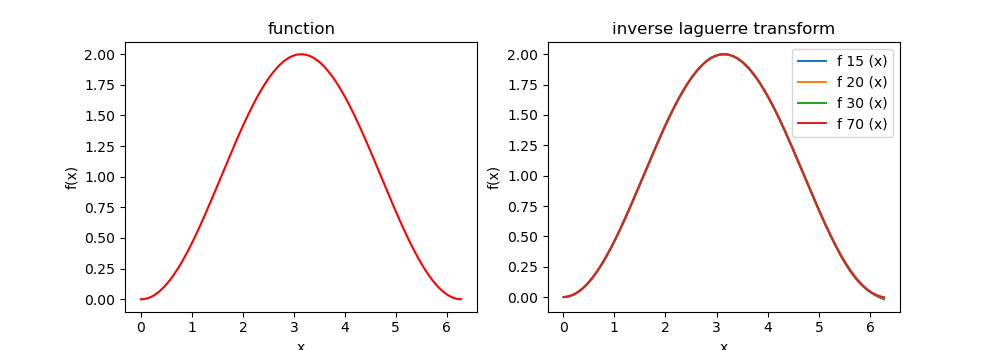

In [12]:
plt.close("all")
graph_for_transform_lag(lag1, f, [15,20,30,70], 0)